In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
#creating database connection

conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,1305720,34301264.40,284098.0,10203839.02,1345638.62,521998.40,137203.36,-24097425.38,-236.160384,0.217580,0.297477
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,1476342,34236370.98,320494.0,9638146.98,1123024.74,588877.32,289858.48,-24598224.00,-255.217357,0.217087,0.281518
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,1686663,30764733.12,374280.0,9076241.20,922280.30,687708.14,247560.44,-21688491.92,-238.958964,0.221906,0.295021
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1815138,29350781.46,400824.0,8951945.76,840100.02,736485.60,514064.14,-20398835.70,-227.870412,0.220823,0.304999
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,1242981,27208854.09,271676.0,8446215.24,1091556.56,499175.66,514064.14,-18762638.85,-222.142561,0.218568,0.310422


In [4]:
# summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,11232.0,1.058796e+04,1.859245e+04,2.00,3957.750000,7153.000000,9552.000000,2.013590e+05
Brand,11232.0,1.809586e+04,1.265366e+04,58.00,5918.750000,18803.500000,25462.500000,9.063100e+04
PurchasePrice,11232.0,2.576935e+01,1.173813e+02,0.36,6.840000,10.520000,19.830000,5.681810e+03
ActualPrice,11232.0,3.767945e+01,1.594988e+02,0.49,10.990000,15.990000,29.990000,7.499990e+03
Volume,11232.0,8.463110e+02,6.527826e+02,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,11232.0,2.690894e+04,9.760642e+04,3.00,243.000000,1890.000000,16094.250000,3.038940e+06
TotalPurchaseDollars,11232.0,2.579333e+05,1.082135e+06,4.41,3407.670000,27735.030000,171692.662500,3.430126e+07
TotalSalesQuantity,11232.0,5.883804e+03,2.140961e+04,0.00,60.000000,440.000000,3541.500000,6.698780e+05
TotalSalesDollars,11232.0,8.084378e+04,3.275860e+05,0.00,1362.030000,9333.380000,52393.745000,1.020384e+07
TotalSalesPrice,11232.0,3.599165e+04,8.804815e+04,0.00,531.150000,4999.000000,29540.680000,1.345639e+06


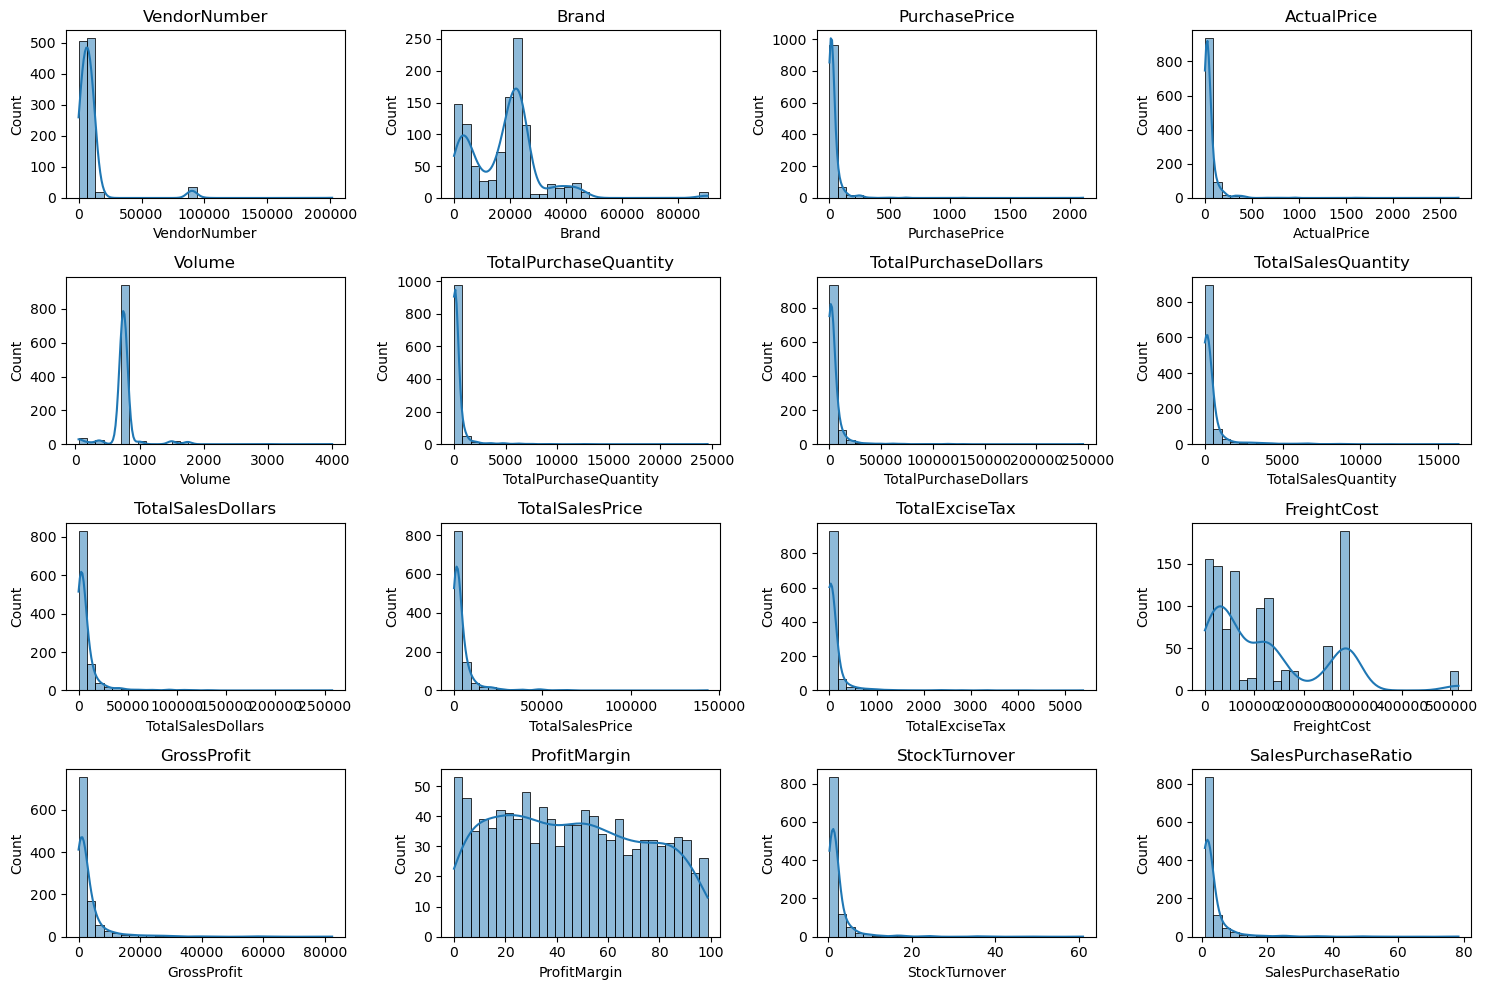

In [11]:
# code for histogram

# distribution pllots for numerical columns

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)   # adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

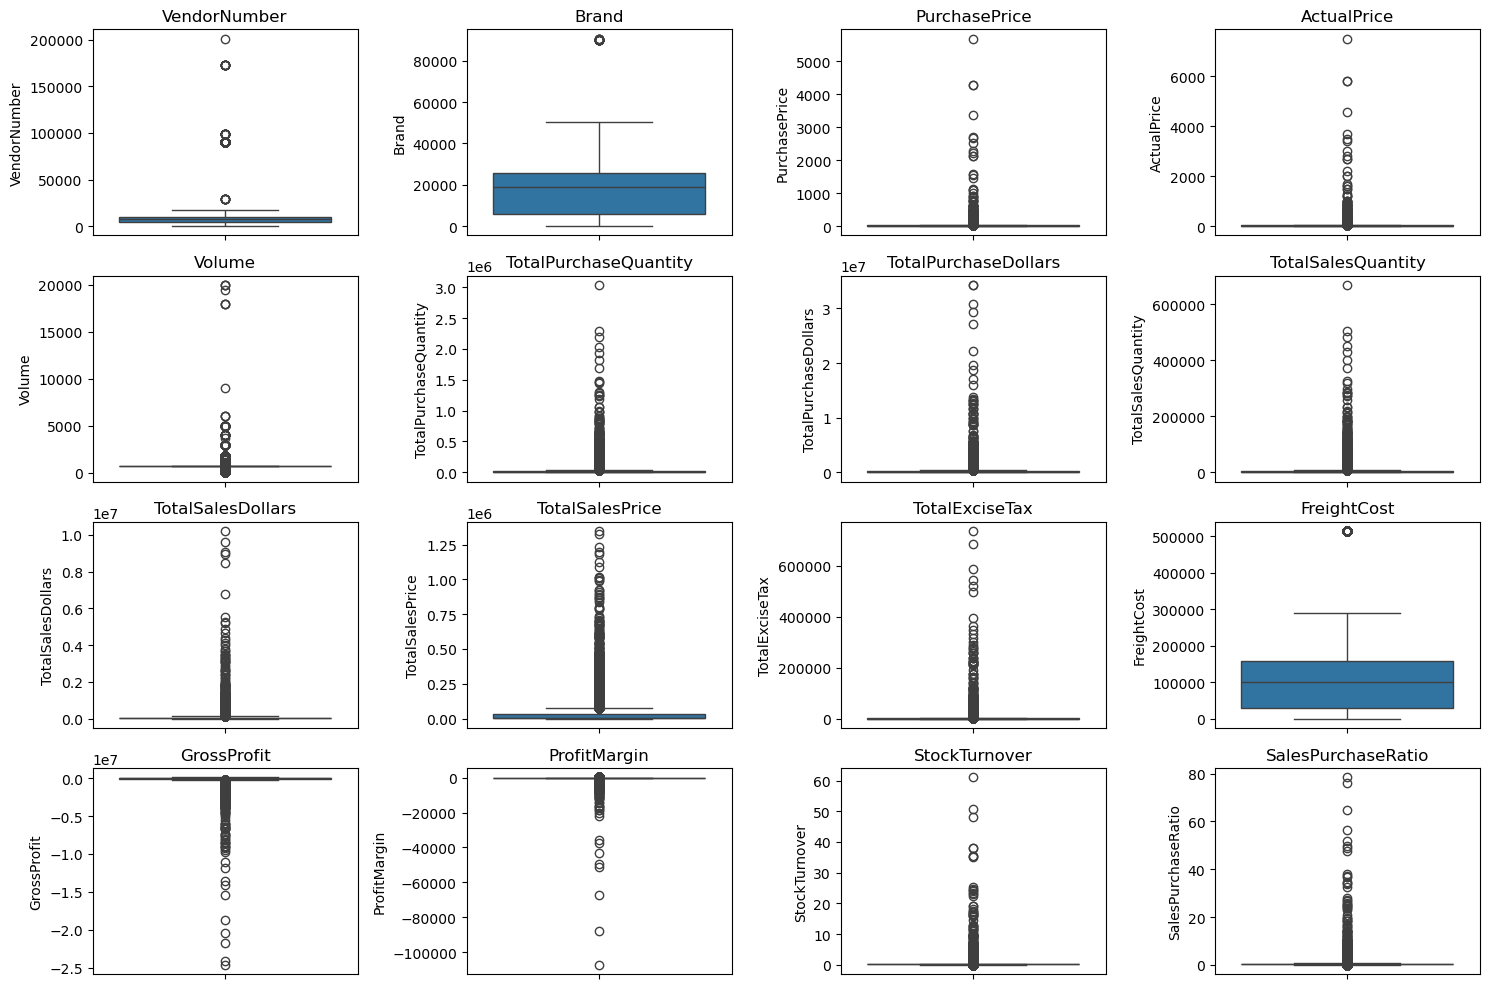

In [6]:
# outlier detection with BOXPLOTS
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
    

In [9]:
# lets filter the data b removing inconsistencies
df = pd.read_sql_query("""select *
from vendor_sales_summary
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity > 0""",conn)

In [10]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,10754,PERFECTA WINES,2208,WhistlePig 10 Yr Old Rye,53.95,74.99,750.0,4545,245202.75,3514.0,257544.86,143440.62,2768.96,57441.04,12342.11,4.792218,0.773157,1.050334
1,4425,MARTIGNETTI COMPANIES,21004,Castle Rock Pnt Nr Carneros,5.19,7.99,750.0,24591,127627.29,16302.0,130252.98,34708.56,1826.50,289858.48,2625.69,2.015839,0.662925,1.020573
2,4425,MARTIGNETTI COMPANIES,18950,Schug Pnt Nr Carneros,12.32,17.99,750.0,9336,115019.52,6472.0,116431.28,48788.88,722.38,289858.48,1411.76,1.212526,0.693231,1.012274
3,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,7614,112763.34,6820.0,134507.80,50382.58,5373.26,178572.54,21744.46,16.165947,0.895718,1.192833
4,9165,ULTRA BEVERAGE COMPANY LLP,28457,Clos Pegase Merlot Napa,11.76,17.99,750.0,8598,101112.48,5880.0,105781.20,47709.48,655.16,136109.40,4668.72,4.413563,0.683880,1.046174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,12546,JIM BEAM BRANDS COMPANY,6066,Sauza Sparkling Margarita,5.38,6.99,750.0,3,16.14,48.0,335.52,293.58,37.86,247761.94,319.38,95.189557,16.000000,20.788104
1072,12546,JIM BEAM BRANDS COMPANY,6064,Sauza Sprklg Wild Berry Marg,4.99,6.99,750.0,3,14.97,8.0,55.92,55.92,6.32,247761.94,40.95,73.229614,2.666667,3.735471
1073,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,6,8.82,144.0,286.56,155.22,30.24,514064.14,277.74,96.922111,24.000000,32.489796
1074,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,9,6.39,172.0,170.28,67.32,8.92,77989.56,163.89,96.247357,19.111111,26.647887


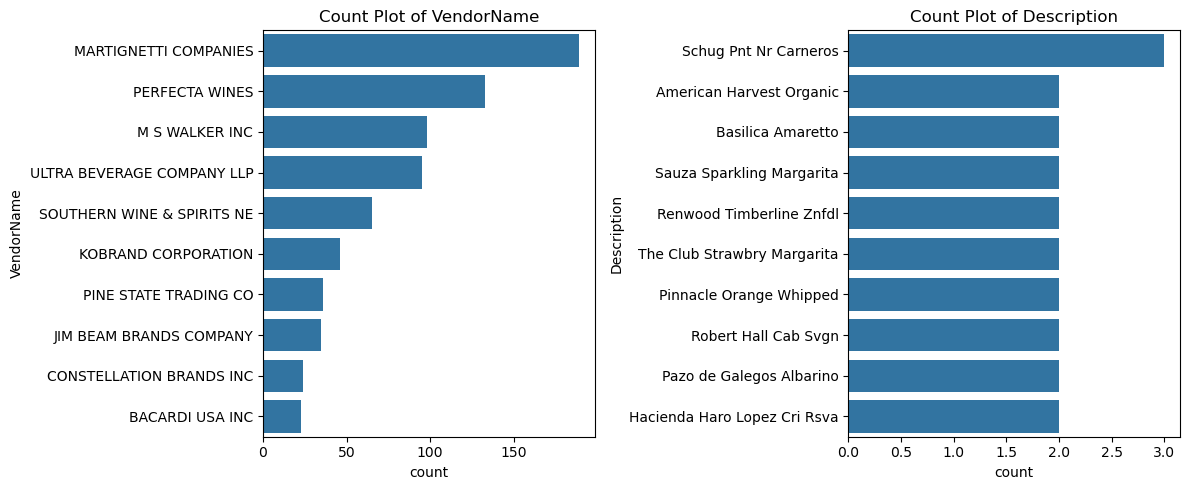

In [12]:
# count plots for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

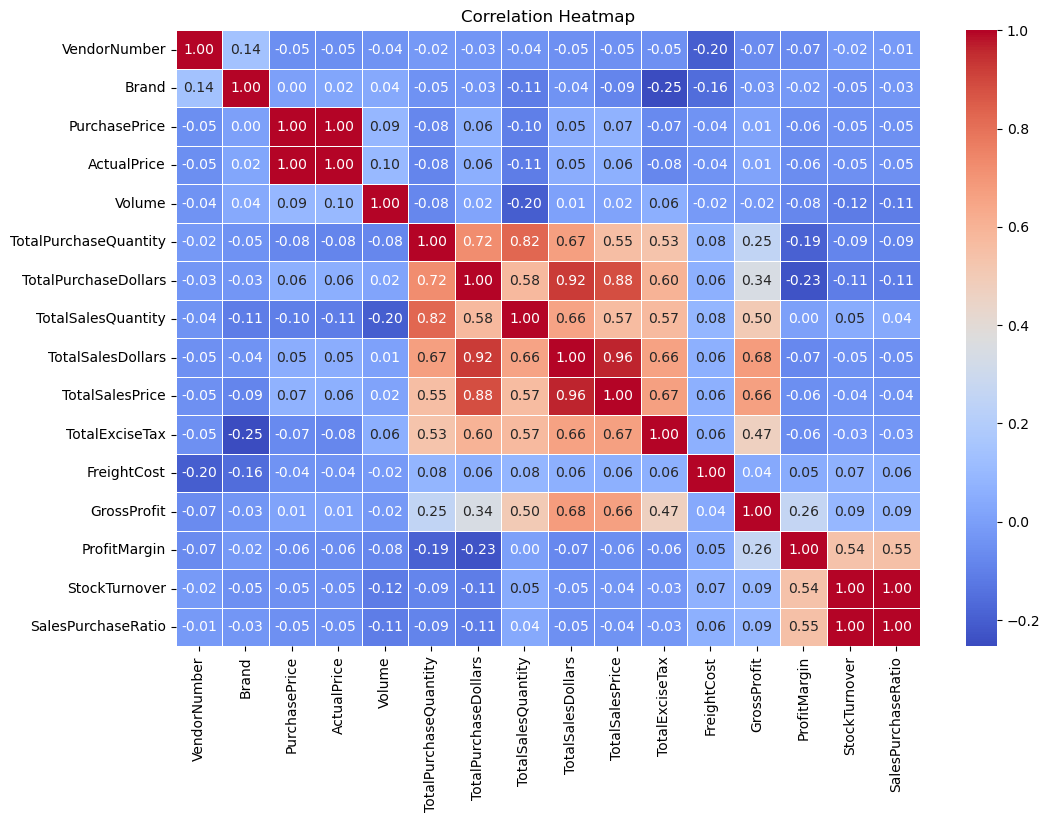

In [13]:
# heatmap is the best way to see relationship between two numericals

# correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
#busniess problem - 1

#identify brand that needs promotional or pricing adjustments with exihibit lower sales performance but higher profit margins   

brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()


In [15]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [16]:
low_sales_threshold

np.float64(933.17)

In [17]:
high_margin_threshold

np.float64(78.34378833645883)

In [19]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] <= high_margin_threshold)
]
print("Brands with low sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
326,Concannon Glen Ellen Wh Zin,31.90,25.517241
345,Crown Royal Apple,55.72,54.127782
319,Cocchi Vermouth di Torino Sw,75.96,2.606635
896,Tracia Syrah,89.88,48.230975
778,Sauza Sprklg Wild Berry Marg,111.84,59.844421
...,...,...,...
460,Guillaume Vrignaud Chablis 1,911.76,1.329297
80,Bella Bolla Pink Moscato,913.78,25.471120
464,HandCraft Artisan Coll Pet S,914.82,35.889027
638,Moonstone Plum Sake,923.36,4.235618


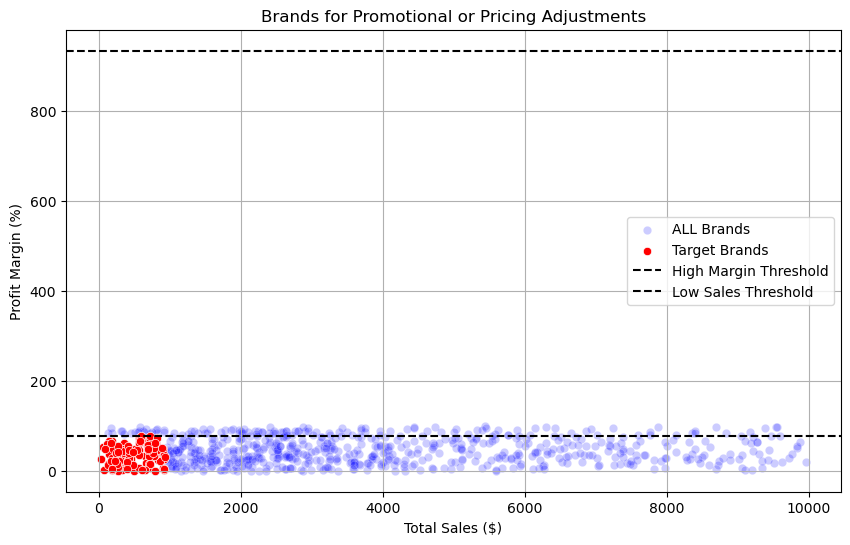

In [24]:
#now providing SCATTERPLOT

plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="ALL Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axhline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# for better visualization

brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

In [26]:
# business problem - 2
# which vendor and brands demonstrate the highest sales performance


top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         1923405.28
ULTRA BEVERAGE COMPANY LLP    1041432.14
PERFECTA WINES                 946245.12
M S WALKER INC                 753321.34
SOUTHERN WINE & SPIRITS NE     460533.00
BACARDI USA INC                390467.84
BROWN-FORMAN CORP              251745.26
STATE WINE & SPIRITS           226320.32
PINE STATE TRADING CO          183232.50
PERNOD RICARD USA              182397.78
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands

Description
WhistlePig 10 Yr Old Rye        257544.86
Schug Pnt Nr Carneros           245742.84
Clos Pegase Merlot Napa         211562.40
Renwood Timberline Znfdl        184012.32
Bacardi Twin Pack 2/750mls      134507.80
Castle Rock Pnt Nr Carneros     130252.98
Pizzolato Pnt Grigio            120535.56
DiSaronna Amaretto Sour VAP     113883.78
Jack Daniels No 7 Black Trav    106232.22
American Harvest Organic        103792.18
Name: TotalSalesDollars, dtype: float64

In [28]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [29]:
top_brands.apply(lambda x : format_dollars(x))

Description
WhistlePig 10 Yr Old Rye        257.54K
Schug Pnt Nr Carneros           245.74K
Clos Pegase Merlot Napa         211.56K
Renwood Timberline Znfdl        184.01K
Bacardi Twin Pack 2/750mls      134.51K
Castle Rock Pnt Nr Carneros     130.25K
Pizzolato Pnt Grigio            120.54K
DiSaronna Amaretto Sour VAP     113.88K
Jack Daniels No 7 Black Trav    106.23K
American Harvest Organic        103.79K
Name: TotalSalesDollars, dtype: object

In [30]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
MARTIGNETTI COMPANIES           1.92M
ULTRA BEVERAGE COMPANY LLP      1.04M
PERFECTA WINES                946.25K
M S WALKER INC                753.32K
SOUTHERN WINE & SPIRITS NE    460.53K
BACARDI USA INC               390.47K
BROWN-FORMAN CORP             251.75K
STATE WINE & SPIRITS          226.32K
PINE STATE TRADING CO         183.23K
PERNOD RICARD USA             182.40K
Name: TotalSalesDollars, dtype: object

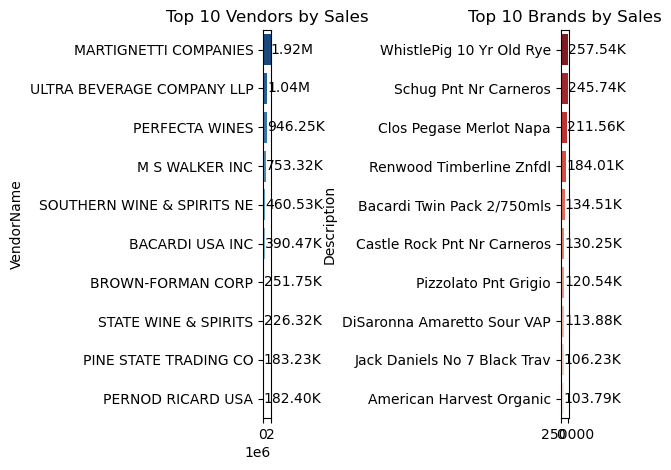

In [32]:
# now we will plot the both the data using bar plot

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# plot for top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [45]:
# business problem 3 

# which vendors contribute the most to total purchase dollars

vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(70, 4)

In [59]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [60]:
round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
33,MARTIGNETTI COMPANIES,1177631.13,745774.15,1923405.28,22.79
41,PERFECTA WINES,646528.68,299716.44,946245.12,12.51
62,ULTRA BEVERAGE COMPANY LLP,617100.90,424331.24,1041432.14,11.94
31,M S WALKER INC,386892.75,366428.59,753321.34,7.49
54,SOUTHERN WINE & SPIRITS NE,223403.01,237129.99,460533.00,4.32
...,...,...,...,...,...
29,LATITUDE BEVERAGE COMPANY,536.22,453.12,989.34,0.01
6,CAPSTONE INTERNATIONAL,491.76,1.98,493.74,0.01
15,DUGGANS DISTILLED PRODUCTS,312.93,114.81,427.74,0.01
19,FLAVOR ESSENCE INC,153.00,2795.82,2948.82,0.00


In [61]:
# display top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ALISA CARR BEVERAGES,53.76K,30.78K,84.54K,1.040472
1,ATLANTIC IMPORTING COMPANY,5.77K,1.81K,7.58K,0.111669
2,BACARDI USA INC,213.31K,177.15K,390.47K,4.128528
3,BANFI PRODUCTS CORP,6.36K,4.48K,10.85K,0.123133
4,BROWN-FORMAN CORP,105.18K,146.56K,251.75K,2.035782
5,CAMPARI AMERICA,22.85K,12.93K,35.78K,0.442234
6,CAPSTONE INTERNATIONAL,491.76,1.9799999999999613,493.73999999999995,0.009518
7,CASTLE BRANDS CORP.,7.52K,6.07K,13.59K,0.145624
8,CONSTELLATION BRANDS INC,81.40K,81.03K,162.43K,1.575420
9,CRUSH WINES,48.01K,9.20K,57.22K,0.929271


In [62]:
top_vendors['PurchaseContribution%'].sum()


np.float64(10.54165033694569)

In [63]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
0,ALISA CARR BEVERAGES,53.76K,30.78K,84.54K,1.040472,1.040472
1,ATLANTIC IMPORTING COMPANY,5.77K,1.81K,7.58K,0.111669,1.152141
2,BACARDI USA INC,213.31K,177.15K,390.47K,4.128528,5.280669
3,BANFI PRODUCTS CORP,6.36K,4.48K,10.85K,0.123133,5.403802
4,BROWN-FORMAN CORP,105.18K,146.56K,251.75K,2.035782,7.439584
5,CAMPARI AMERICA,22.85K,12.93K,35.78K,0.442234,7.881818
6,CAPSTONE INTERNATIONAL,491.76,1.9799999999999613,493.73999999999995,0.009518,7.891336
7,CASTLE BRANDS CORP.,7.52K,6.07K,13.59K,0.145624,8.036959
8,CONSTELLATION BRANDS INC,81.40K,81.03K,162.43K,1.575420,9.612379
9,CRUSH WINES,48.01K,9.20K,57.22K,0.929271,10.541650


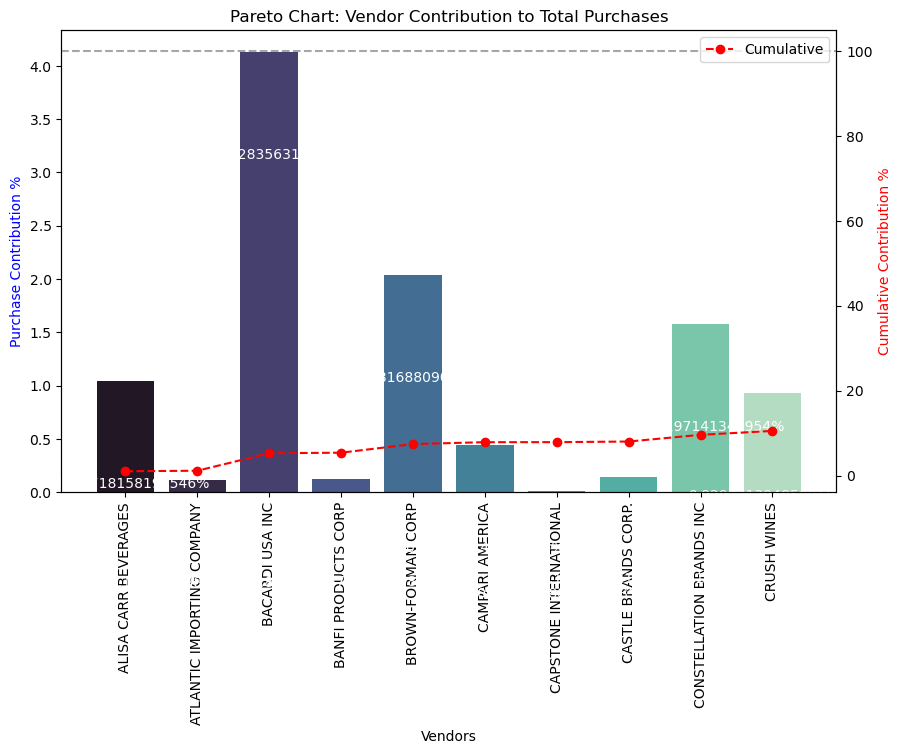

In [64]:
# pareto chart

fig, ax1 = plt.subplots(figsize=(10, 6))

# bar plot for purchase contribution%

sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [54]:
print(top_vendors.columns)


Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'PurchaseContribution%',
       'Cumulative_Contribution%'],
      dtype='object')


In [53]:
top_vendors = top_vendors.reset_index()


In [66]:
# business problem 4

# how much of total procurement is dependent on the top vendors

print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")


Total Purchase Contribution of top 10 vendors is 10.54 %


Text(0.5, 1.0, "Top 10 Vendor's Purchase Contribution (%)")

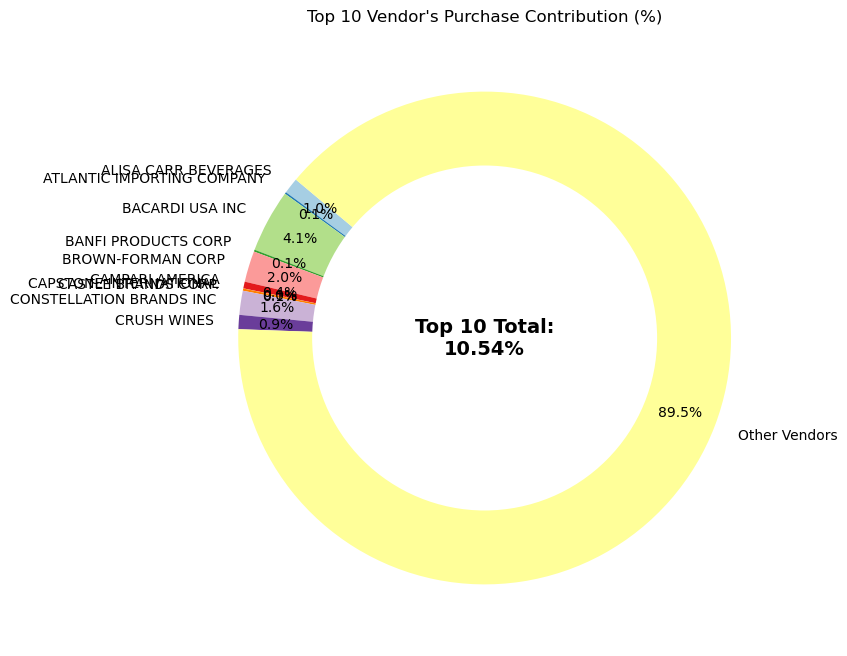

In [68]:
#using pie chart 


vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# append "other vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#draw a white circle in the center to create a "donut" effect

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# add total contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")

In [ ]:
#business problem 5 

# does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings



In [72]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [71]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [74]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,4545
1,Large,24591
2,Large,9336
3,Large,7614
4,Large,8598
...,...,...
1071,Small,3
1072,Small,3
1073,Small,6
1074,Small,9


In [75]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,62.593043
Medium,30.771834
Large,13.300501


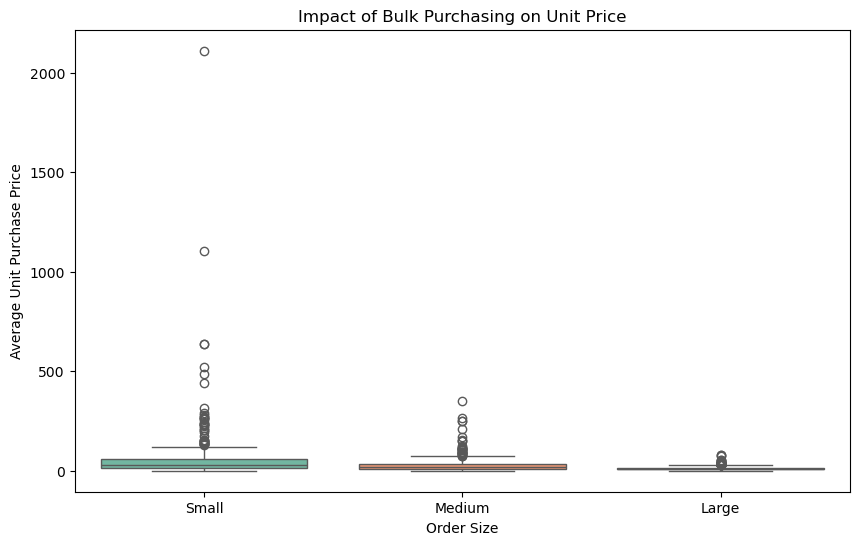

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [79]:
# business problem 6

# which vendors have low inventory turnover indicating excess stock and slow-moving products
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
WESTERN SPIRITS BEVERAGE CO,0.483826
Circa Wines,0.492375
DELICATO VINEYARDS INC,0.602357
WINE GROUP INC,0.611111
LAIRD & CO,0.690476
TRINCHERO FAMILY ESTATES,0.695551
SHAW ROSS INT L IMP LTD,0.716049
VINEXTRA INC,0.716981
SOUTHERN WINE & SPIRITS NE,0.717258


In [80]:
# business problem 7

#how much capital is   locked in unsold inventory per vendor and which vendors contribute the most to it 

df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))


Total Unsold Capital: -837169.06


In [81]:
# aggregate capital locked per vendor

inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#sort vendors with the highest locked capital

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
41,PERFECTA WINES,15.62K
22,HEAVEN HILL DISTILLERIES,13.68K
13,DIAGEO NORTH AMERICA INC,11.77K
9,CRUSH WINES,9.95K
53,SIDNEY FRANK IMPORTING CO,7.77K
61,TRINCHERO FAMILY ESTATES,5.57K
20,FORTUNE WINE BROKERS LLC,4.43K
11,DELICATO VINEYARDS INC,4.37K
36,MOET HENNESSY USA INC,3.55K
16,E & J GALLO WINERY,3.25K


In [82]:
#business problem 8
#what is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)


In [83]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] >= low_threshold]["ProfitMargin"].dropna()

In [84]:
top_vendors

0       4.792218
1       2.015839
2       1.212526
3      16.165947
4       4.413563
         ...    
741    92.594539
773    96.326036
814    94.913977
949    97.904018
957    97.989609
Name: ProfitMargin, Length: 269, dtype: float64

In [85]:
low_vendors

0        4.792218
1        2.015839
2        1.212526
3       16.165947
4        4.413563
          ...    
1032    98.075002
1033    98.221304
1040    98.684393
1043    98.724954
1046    97.271486
Name: ProfitMargin, Length: 807, dtype: float64

In [86]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (39.56, 46.15), Mean: 42.86
Low Vendors 95% CI: (43.77, 47.67), Mean: 45.72


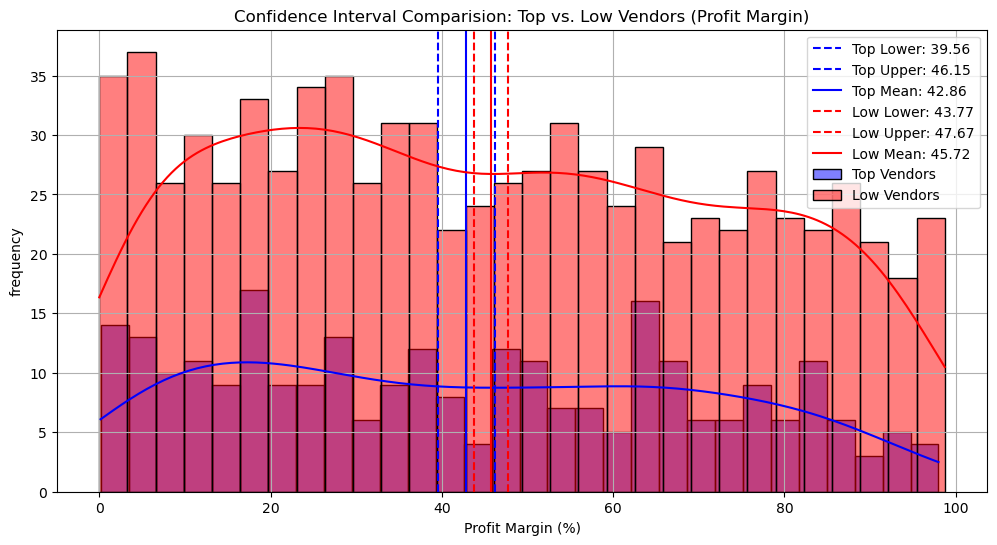

In [87]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

#top vendors plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

#low vendors plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

#finalize plot
plt.title("Confidence Interval Comparision: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("frequency")
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# business problem 9

# is there a significant difference in profit margins between top-performing and low-performing vendors

# in this we would be performing hypothesis 



top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] >= low_threshold]["ProfitMargin"].dropna()

# perform two-sample t-test

t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

#print results

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")


T-Statistic: -1.4718, P-Value: 0.1418
Fail to Reject H0: No significant difference in profit margins.


In [90]:
conn.commit()
conn.close()
